#### AIM IS TO CLASSIFY WHETHER  CUSTOMER WILL CHURN OUT OR NOT ALONG WITH PROABABILITIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [2]:
air=pd.read_csv("/Users/noshitha/Downloads/MemberAttrition.csv")

## EXPLORATORY DATA ANALYSIS

ACCORDING TO THE GIVEN PROBLEM IT IS MULTIVARIATE ANALYSIS.

In [3]:
air.columns

Index(['Unnamed: 0', 'AGE', 'GENDER', 'IS_COBRAND', 'TIER', 'YEARS_IN_PROGRAM',
       'IS_AIRACCRUAL', 'IS_HOTELREDEMPTION', 'IS_INACTIVE'],
      dtype='object')

In [4]:
air=air.drop(columns=['Unnamed: 0'])

In [5]:
air.shape

(100000, 8)

In [6]:
air.ndim

2

In [7]:
air.nunique

<bound method DataFrame.nunique of        AGE   GENDER  IS_COBRAND      TIER  YEARS_IN_PROGRAM  IS_AIRACCRUAL  \
0       60     male           0      gold                 3              1   
1       74     male           1      base                 2              0   
2       29   female           0      gold                11              0   
3       25  unknown           0      gold                 3              1   
4       29   female           1      base                 8              1   
...    ...      ...         ...       ...               ...            ...   
99995   37   female           1  platinum                 1              1   
99996   20     male           1      base                 5              1   
99997   65     male           0      gold                 2              1   
99998   71  unknown           0  platinum                 7              0   
99999   52  unknown           1  platinum                 3              1   

       IS_HOTELREDEMPTION  I

### META DATA (DATA PROFILING)

Given Data has 8 independent varaibles and 1 dependent variable

INDEPENDENT VARIABLES ARE::

1)"Unnamed:0 "is the name of the customers but represented in numericals and does not have effect on output variable.

2) "AGE" represents age of the customer (It is continous data)

3) "GENDER" describes the gender of the customer( It is categorical - male,female)

4)  IS_COBRAND describes whether customer have subscription in other airlines.(Categorical -0(no),1(yes)

5) "TIER" describes the type of subscription they have ( Categorical - base,gold ,platinum and silver)

6) "YEARS_IN_PROGRAM" describes no.of years customers are using the airlines company.(It is continous )

 7) " IS_AIRACCruAL " descrbes whether the airlines ticket prices or expenses increased (Categorical -0(no),1(yes)


8) "IS_HOTEL REDEMPTION" describes whether they have used previlage points at hotels.(Categorical -0(no),1(yes)

DEPENDENT VARIABLE:::
 "IS_INACTIVE" describes whether he is actively using the airlines or not( Categorical -0(no),1(yes)

In [8]:
air.head()

,AGE,GENDER,IS_COBRAND,TIER,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,IS_INACTIVE
0,60,male,0,gold,3,1,0,1
1,74,male,1,base,2,0,1,0
2,29,female,0,gold,11,0,1,0
3,25,unknown,0,gold,3,1,1,0
4,29,female,1,base,8,1,1,1


In [9]:
air.tail()

,AGE,GENDER,IS_COBRAND,TIER,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,IS_INACTIVE
99995,37,female,1,platinum,1,1,0,1
99996,20,male,1,base,5,1,0,1
99997,65,male,0,gold,2,1,0,1
99998,71,unknown,0,platinum,7,0,0,1
99999,52,unknown,1,platinum,3,1,0,0


# DATA TYPES IN DATA SET

In [10]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   AGE                 100000 non-null  int64 
 1   GENDER              100000 non-null  object
 2   IS_COBRAND          100000 non-null  int64 
 3   TIER                100000 non-null  object
 4   YEARS_IN_PROGRAM    100000 non-null  int64 
 5   IS_AIRACCRUAL       100000 non-null  int64 
 6   IS_HOTELREDEMPTION  100000 non-null  int64 
 7   IS_INACTIVE         100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [11]:
air[air.columns].describe()

,AGE,IS_COBRAND,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,IS_INACTIVE
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,42.918470,0.499570,5.992720,0.498770,0.50166,0.502590
std,18.196176,0.500002,3.164713,0.500001,0.50000,0.499996
min,12.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,27.000000,0.000000,3.000000,0.000000,0.00000,0.000000
50%,43.000000,0.000000,6.000000,0.000000,1.00000,1.000000
75%,59.000000,1.000000,9.000000,1.000000,1.00000,1.000000
max,74.000000,1.000000,11.000000,1.000000,1.00000,1.000000


In [12]:
air.dtypes

AGE                    int64
GENDER                object
IS_COBRAND             int64
TIER                  object
YEARS_IN_PROGRAM       int64
IS_AIRACCRUAL          int64
IS_HOTELREDEMPTION     int64
IS_INACTIVE            int64
dtype: object

##### DETAILED STATISTICAL ANALYSIS OF EACH ATTRIBUTE

In [13]:
air.groupby(air['GENDER']).describe().reset_index()

GENDER      AGE                                                      \
              count       mean        std   min   25%   50%   75%   max   
0   female  33289.0  42.812701  18.212057  12.0  27.0  43.0  59.0  74.0   
1     male  33565.0  43.062804  18.181332  12.0  27.0  43.0  59.0  74.0   
2  unknown  33146.0  42.878537  18.194863  12.0  27.0  43.0  59.0  74.0   

  IS_COBRAND  ... IS_HOTELREDEMPTION      IS_INACTIVE                      \
       count  ...                75%  max       count      mean       std   
0    33289.0  ...                1.0  1.0     33289.0  0.503079  0.499998   
1    33565.0  ...                1.0  1.0     33565.0  0.503084  0.499998   
2    33146.0  ...                1.0  1.0     33146.0  0.501599  0.500005   

                            
   min  25%  50%  75%  max  
0  0.0  0.0  1.0  1.0  1.0  
1  0.0  0.0  1.0  1.0  1.0  
2  0.0  0.0  1.0  1.0  1.0  

[3 rows x 49 columns]

We need to replace unknown with mode of gender attribute

In [14]:
air.groupby(air['IS_COBRAND']).describe().reset_index()

IS_COBRAND      AGE                                                      \
                count       mean        std   min   25%   50%   75%   max   
0          0  50043.0  42.931879  18.246874  12.0  27.0  43.0  59.0  74.0   
1          1  49957.0  42.905038  18.145422  12.0  27.0  43.0  59.0  74.0   

  YEARS_IN_PROGRAM  ... IS_HOTELREDEMPTION      IS_INACTIVE            \
             count  ...                75%  max       count      mean   
0          50043.0  ...                1.0  1.0     50043.0  0.503367   
1          49957.0  ...                1.0  1.0     49957.0  0.501812   

                                      
        std  min  25%  50%  75%  max  
0  0.499994  0.0  0.0  1.0  1.0  1.0  
1  0.500002  0.0  0.0  1.0  1.0  1.0  

[2 rows x 41 columns]

In [15]:
air.groupby(air['TIER']).describe().reset_index()

TIER      AGE                                                      \
               count       mean        std   min   25%   50%   75%   max   
0      base  24784.0  42.796078  18.176227  12.0  27.0  43.0  59.0  74.0   
1      gold  25206.0  43.005634  18.199851  12.0  27.0  43.0  59.0  74.0   
2  platinum  24952.0  42.954793  18.167234  12.0  27.0  43.0  59.0  74.0   
3    silver  25058.0  42.915676  18.241377  12.0  27.0  43.0  59.0  74.0   

  IS_COBRAND  ... IS_HOTELREDEMPTION      IS_INACTIVE                      \
       count  ...                75%  max       count      mean       std   
0    24784.0  ...                1.0  1.0     24784.0  0.507222  0.499958   
1    25206.0  ...                1.0  1.0     25206.0  0.500040  0.500010   
2    24952.0  ...                1.0  1.0     24952.0  0.500160  0.500010   
3    25058.0  ...                1.0  1.0     25058.0  0.502993  0.500001   

                            
   min  25%  50%  75%  max  
0  0.0  0.0  1.0  1.0  1.0  
1  0.0  0.0  1.0  1.0  1.0  
2  0.0  0.0  1.0  1.0  1.0  
3  0.0  0.0  1.0  1.0  1.0  

[4 rows x 49 columns]

In [16]:
air.groupby(air['YEARS_IN_PROGRAM']).describe().reset_index()

YEARS_IN_PROGRAM     AGE                                                \
                      count       mean        std   min   25%   50%   75%   
0                 1  9128.0  43.401402  18.280670  12.0  27.0  44.0  59.0   
1                 2  9184.0  42.901895  18.108168  12.0  27.0  43.0  58.0   
2                 3  9077.0  43.004517  18.185836  12.0  27.0  43.0  59.0   
3                 4  9020.0  43.035588  18.108320  12.0  28.0  43.0  59.0   
4                 5  9086.0  43.115672  18.212394  12.0  27.0  43.0  59.0   
5                 6  9227.0  42.787255  18.178408  12.0  27.0  43.0  58.0   
6                 7  9135.0  42.901478  18.265592  12.0  27.0  43.0  59.0   
7                 8  8926.0  42.829711  18.231561  12.0  27.0  43.0  59.0   
8                 9  8936.0  42.943151  18.144817  12.0  27.0  43.0  59.0   
9                10  9195.0  42.548233  18.278301  12.0  27.0  42.0  58.0   
10               11  9086.0  42.638565  18.156602  12.0  27.0  42.0  58.0   

         IS_COBRAND  ... IS_HOTELREDEMPTION      IS_INACTIVE            \
     max      count  ...                75%  max       count      mean   
0   74.0     9128.0  ...                1.0  1.0      9128.0  0.514899   
1   74.0     9184.0  ...                1.0  1.0      9184.0  0.503484   
2   74.0     9077.0  ...                1.0  1.0      9077.0  0.502258   
3   74.0     9020.0  ...                1.0  1.0      9020.0  0.500222   
4   74.0     9086.0  ...                1.0  1.0      9086.0  0.501321   
5   74.0     9227.0  ...                1.0  1.0      9227.0  0.500813   
6   74.0     9135.0  ...                1.0  1.0      9135.0  0.502791   
7   74.0     8926.0  ...                1.0  1.0      8926.0  0.500560   
8   74.0     8936.0  ...                1.0  1.0      8936.0  0.505036   
9   74.0     9195.0  ...                1.0  1.0      9195.0  0.500707   
10  74.0     9086.0  ...                1.0  1.0      9086.0  0.496368   

                                       
         std  min  25%  50%  75%  max  
0   0.499805  0.0  0.0  1.0  1.0  1.0  
1   0.500015  0.0  0.0  1.0  1.0  1.0  
2   0.500022  0.0  0.0  1.0  1.0  1.0  
3   0.500028  0.0  0.0  1.0  1.0  1.0  
4   0.500026  0.0  0.0  1.0  1.0  1.0  
5   0.500026  0.0  0.0  1.0  1.0  1.0  
6   0.500020  0.0  0.0  1.0  1.0  1.0  
7   0.500028  0.0  0.0  1.0  1.0  1.0  
8   0.500003  0.0  0.0  1.0  1.0  1.0  
9   0.500027  0.0  0.0  1.0  1.0  1.0  
10  0.500014  0.0  0.0  0.0  1.0  1.0  

[11 rows x 41 columns]

In [17]:
air.groupby(air['IS_AIRACCRUAL']).describe().reset_index()

IS_AIRACCRUAL      AGE                                                      \
                   count       mean        std   min   25%   50%   75%   max   
0             0  50123.0  42.978313  18.195947  12.0  27.0  43.0  59.0  74.0   
1             1  49877.0  42.858331  18.196391  12.0  27.0  43.0  59.0  74.0   

  IS_COBRAND  ... IS_HOTELREDEMPTION      IS_INACTIVE                      \
       count  ...                75%  max       count      mean       std   
0    50123.0  ...                1.0  1.0     50123.0  0.500948  0.500004   
1    49877.0  ...                1.0  1.0     49877.0  0.504240  0.499987   

                            
   min  25%  50%  75%  max  
0  0.0  0.0  1.0  1.0  1.0  
1  0.0  0.0  1.0  1.0  1.0  

[2 rows x 41 columns]

In [18]:
air.groupby(air['IS_HOTELREDEMPTION']).describe().reset_index()

IS_HOTELREDEMPTION      AGE                                                \
                        count       mean        std   min   25%   50%   75%   
0                  0  49834.0  42.792511  18.209291  12.0  27.0  43.0  58.0   
1                  1  50166.0  43.043595  18.182457  12.0  27.0  43.0  59.0   

        IS_COBRAND  ... IS_AIRACCRUAL      IS_INACTIVE                      \
    max      count  ...           75%  max       count      mean       std   
0  74.0    49834.0  ...           1.0  1.0     49834.0  0.498294  0.500002   
1  74.0    50166.0  ...           1.0  1.0     50166.0  0.506857  0.499958   

                            
   min  25%  50%  75%  max  
0  0.0  0.0  0.0  1.0  1.0  
1  0.0  0.0  1.0  1.0  1.0  

[2 rows x 41 columns]

In [19]:
air.groupby(air['IS_INACTIVE']).describe().reset_index()

IS_INACTIVE      AGE                                                      \
                 count       mean        std   min   25%   50%   75%   max   
0           0  49741.0  42.850968  18.179234  12.0  27.0  43.0  59.0  74.0   
1           1  50259.0  42.985276  18.212863  12.0  27.0  43.0  59.0  74.0   

  IS_COBRAND  ... IS_AIRACCRUAL      IS_HOTELREDEMPTION                      \
       count  ...           75%  max              count      mean       std   
0    49741.0  ...           1.0  1.0            49741.0  0.497356  0.499998   
1    50259.0  ...           1.0  1.0            50259.0  0.505919  0.499970   

                            
   min  25%  50%  75%  max  
0  0.0  0.0  0.0  1.0  1.0  
1  0.0  0.0  1.0  1.0  1.0  

[2 rows x 41 columns]

In [20]:
air.describe()

,AGE,IS_COBRAND,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,IS_INACTIVE
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,42.918470,0.499570,5.992720,0.498770,0.50166,0.502590
std,18.196176,0.500002,3.164713,0.500001,0.50000,0.499996
min,12.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,27.000000,0.000000,3.000000,0.000000,0.00000,0.000000
50%,43.000000,0.000000,6.000000,0.000000,1.00000,1.000000
75%,59.000000,1.000000,9.000000,1.000000,1.00000,1.000000
max,74.000000,1.000000,11.000000,1.000000,1.00000,1.000000


# DESCRIPTIVE STATISTICS

GETTING UNIQUE VALUES IN EACH ATTRIBUTE

In [21]:
air.AGE.unique()

array([60, 74, 29, 25, 61, 47, 42, 45, 64, 55, 56, 23, 51, 67, 69, 72, 31,
       37, 50, 17, 48, 35, 24, 54, 44, 65, 22, 18, 36, 43, 40, 28, 34, 33,
       26, 41, 21, 52, 30, 68, 71, 66, 39, 59, 62, 19, 73, 46, 12, 58, 13,
       20, 49, 14, 27, 38, 70, 53, 15, 63, 16, 57, 32])

In [22]:
air.GENDER.unique()# categorical

array(['male', 'female', 'unknown'], dtype=object)

In [23]:
air.IS_COBRAND.unique()# categorical

array([0, 1])

In [24]:
air.TIER.unique()# cateorical

array(['gold', 'base', 'silver', 'platinum'], dtype=object)

In [25]:
air.YEARS_IN_PROGRAM.unique()

array([ 3,  2, 11,  8,  1, 10,  9,  4,  6,  5,  7])

In [26]:
air.IS_AIRACCRUAL.unique()# categorical

array([1, 0])

In [27]:
air.IS_HOTELREDEMPTION.unique()# categorical

array([0, 1])

In [28]:
air.isnull().sum()

AGE                   0
GENDER                0
IS_COBRAND            0
TIER                  0
YEARS_IN_PROGRAM      0
IS_AIRACCRUAL         0
IS_HOTELREDEMPTION    0
IS_INACTIVE           0
dtype: int64

###### There are no null values in the given  dataset .  So we do not need to Impute them. 

##### 1st BUSINESS MOMENT DECISION( CENTRAL TENDENCIES)

In [29]:
air.mean()

/var/folders/bm/l2zpyjxn2gqg_1d20xgx5z0w0000gn/T/ipykernel_32255/2699225666.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  air.mean()


AGE                   42.91847
IS_COBRAND             0.49957
YEARS_IN_PROGRAM       5.99272
IS_AIRACCRUAL          0.49877
IS_HOTELREDEMPTION     0.50166
IS_INACTIVE            0.50259
dtype: float64

In [30]:
air.median()

/var/folders/bm/l2zpyjxn2gqg_1d20xgx5z0w0000gn/T/ipykernel_32255/4062833675.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  air.median()


AGE                   43.0
IS_COBRAND             0.0
YEARS_IN_PROGRAM       6.0
IS_AIRACCRUAL          0.0
IS_HOTELREDEMPTION     1.0
IS_INACTIVE            1.0
dtype: float64

In [31]:
air.mode()

,AGE,GENDER,IS_COBRAND,TIER,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,IS_INACTIVE
0,23,male,0,gold,6,0,1,1


REPLACING UKNOWN WITH MALE AS GENDER IS A DISCRETE CATEGORICAL DATA.

In [32]:
air.GENDER = air.GENDER.str.replace('unknown', 'male')
air['GENDER'].unique()

array(['male', 'female'], dtype=object)

#### 2ND BUSINESS MOMENT DECISION(VARIANCE,STANADARD DEVIATION AND RANGE)

In [33]:
print("Variances:")
print("-------------------------------")
print(np.var(air))
print("\nStandard Deviation:")
print("-------------------------------")
print(np.std(air))


Variances:
-------------------------------
AGE                   331.097523
IS_COBRAND              0.250000
YEARS_IN_PROGRAM       10.015307
IS_AIRACCRUAL           0.249998
IS_HOTELREDEMPTION      0.249997
IS_INACTIVE             0.249993
dtype: float64

Standard Deviation:
-------------------------------
AGE                   18.196085
IS_COBRAND             0.500000
YEARS_IN_PROGRAM       3.164697
IS_AIRACCRUAL          0.499998
IS_HOTELREDEMPTION     0.499997
IS_INACTIVE            0.499993
dtype: float64


/Users/noshitha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3755: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/noshitha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [34]:
print("\nRange")
print("-------------------------------")
for c in air.columns:
    if c=="GENDER":
          continue
    elif c=="TIER":
        print("")
    else:
        print(c+":    "+str(max(air[c])-min(air[c])))


Range
-------------------------------
AGE:    62
IS_COBRAND:    1

YEARS_IN_PROGRAM:    10
IS_AIRACCRUAL:    1
IS_HOTELREDEMPTION:    1
IS_INACTIVE:    1


#### 3RD BMD(SKEWNESS )

In [35]:
for c in air.columns:
    if c == "GENDER":
        continue
    elif c=="TIER":
         print("") 
    else:
        print(c+":    "+ str(stats.skew(air[c])))


AGE:    0.007204250475998513
IS_COBRAND:    0.0017200006360560327

YEARS_IN_PROGRAM:    0.004043950944552483
IS_AIRACCRUAL:    0.004920014887003781
IS_HOTELREDEMPTION:    -0.006640036594670585
IS_INACTIVE:    -0.010360138994629073


FOR AGE , IS_COBRAND,YEARS AND AIR ACCURAL SKEWNESS IS +VE .. IT STATES MEAN>MEDIAN DATA OF THAT FEATURES ARE RIGHT SKEWED.

FOR HOTEL REDEMPTION SKEWNESS IS -VE IT STATES MEAN<MEDIAN

#### 4TH BMD (KURTOSIS)

In [36]:
for c in air.columns:
    if c == "GENDER":
        continue
    elif c=="TIER":
         print("") 
    else:
        print(c+":    "+ str(stats.kurtosis(air[c])))


AGE:    -1.2005133964756391
IS_COBRAND:    -1.9999970415978119

YEARS_IN_PROGRAM:    -1.2201291906520408
IS_AIRACCRUAL:    -1.999975793453511
IS_HOTELREDEMPTION:    -1.9999559099140214
IS_INACTIVE:    -1.9998926675200126



KURTOSIS IS <3 FOR ALL FEATURES IT MEANS LESS OUTLIERS ,LESS STANDARD DEVIATIONS.. OUR DATA SET GOOD. BUT WE STILL TREAT OR DO ACTION ON OUTLIERS FOR BETTER ACCURACY.

###### VISUALIZATIONS TO GET BETTER INSIGHTS ON PATTERNS IN DATA 

###### NORMAL DISTRIBUTION OF FEATURES

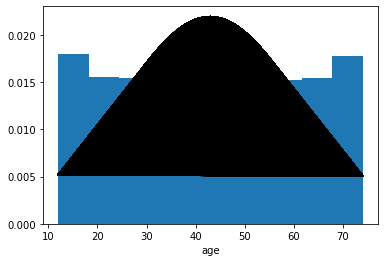

In [37]:
t=air.AGE
fit = stats.norm.pdf(t, np.mean(t), np.std(t))  
plt.plot(t,fit,'-0')
plt.hist(t,density=True)
plt.xlabel("age")
plt.show()              

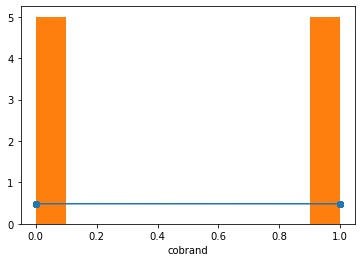

In [38]:
t=air.IS_COBRAND
fit = stats.norm.pdf(t, np.mean(t), np.std(t))  
plt.plot(t,fit,'-o')
plt.hist(t,density=True)
plt.xlabel("cobrand")
plt.show()   


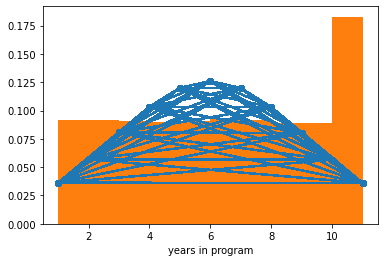

In [39]:
t=air.YEARS_IN_PROGRAM
fit = stats.norm.pdf(t, np.mean(t), np.std(t))  
plt.plot(t,fit,'-o')
plt.hist(t,density=True)
plt.xlabel("years in program")
plt.show()   


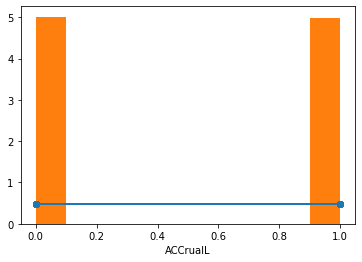

In [40]:
t=air.IS_AIRACCRUAL
fit = stats.norm.pdf(t, np.mean(t), np.std(t))  
plt.plot(t,fit,'-o')
plt.hist(t,density=True)
plt.xlabel("ACCrualL")
plt.show()   

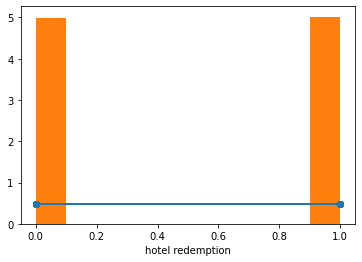

In [41]:
t=air.IS_HOTELREDEMPTION
fit = stats.norm.pdf(t, np.mean(t), np.std(t))  
plt.plot(t,fit,'-o')
plt.hist(t,density=True)
plt.xlabel("hotel redemption")
plt.show()   


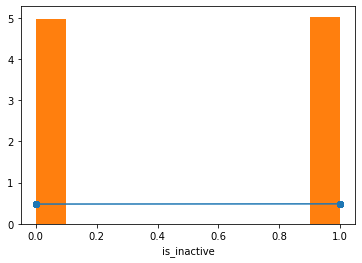

In [42]:
t=air.IS_INACTIVE
fit = stats.norm.pdf(t, np.mean(t), np.std(t))  
plt.plot(t,fit,'-o')
plt.hist(t,density=True)
plt.xlabel("is_inactive")
plt.show()   


### CORRELATION

In [43]:
air.corr()

,AGE,IS_COBRAND,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,IS_INACTIVE
AGE,1.000000,-0.000738,-0.009567,-0.003297,0.006899,0.003691
IS_COBRAND,-0.000738,1.000000,-0.008224,-0.001842,-0.000937,-0.001556
YEARS_IN_PROGRAM,-0.009567,-0.008224,1.000000,0.002301,-0.001269,-0.005385
IS_AIRACCRUAL,-0.003297,-0.001842,0.002301,1.000000,-0.005012,0.003293
IS_HOTELREDEMPTION,0.006899,-0.000937,-0.001269,-0.005012,1.000000,0.008563
IS_INACTIVE,0.003691,-0.001556,-0.005385,0.003293,0.008563,1.000000


<AxesSubplot:>

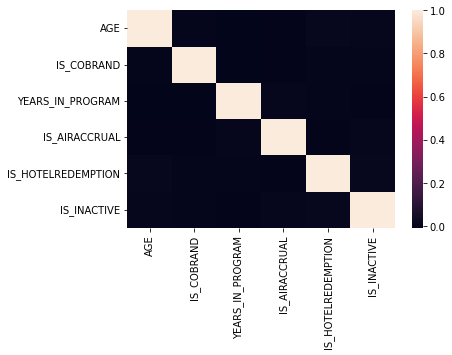

In [44]:
sns.heatmap(air.corr())

out put variable have high correlation with is_ hotel redemption compared to others but not much correlation to preidict exactly the  output variable

# PEARSONS CORRELATION CO-EFFIECIENT

In [45]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

print("Pearsons correlation:")
corr = pearsonr(air.AGE, air.YEARS_IN_PROGRAM)
print(corr)
print("--------------------")

Pearsons correlation:
(-0.009566946517158878, 0.0024833279919790757)
--------------------


In [46]:
spearmanr(air['IS_HOTELREDEMPTION'],air['IS_INACTIVE'])

SpearmanrResult(correlation=0.008562964474921355, pvalue=0.006771798679757948)

# CONTINGENCY TABLE

In [47]:
pd.crosstab(air['GENDER'],air['IS_INACTIVE'],margins=True)

IS_INACTIVE,0,1,All
GENDER,,,
female,16542,16747,33289
male,33199,33512,66711
All,49741,50259,100000


In [48]:
pd.crosstab(air['IS_COBRAND'],air['IS_INACTIVE'],margins=True)

IS_INACTIVE,0,1,All
IS_COBRAND,,,
0,24853,25190,50043
1,24888,25069,49957
All,49741,50259,100000


In [49]:
pd.crosstab(air['TIER'],air['IS_INACTIVE'],margins=True)

IS_INACTIVE,0,1,All
TIER,,,
base,12213,12571,24784
gold,12602,12604,25206
platinum,12472,12480,24952
silver,12454,12604,25058
All,49741,50259,100000


In [50]:
pd.crosstab(air['IS_AIRACCRUAL'],air['IS_INACTIVE'],margins=True)

IS_INACTIVE,0,1,All
IS_AIRACCRUAL,,,
0,25014,25109,50123
1,24727,25150,49877
All,49741,50259,100000


In [51]:
pd.crosstab(air['IS_HOTELREDEMPTION'],air['IS_INACTIVE'],margins=True)

IS_INACTIVE,0,1,All
IS_HOTELREDEMPTION,,,
0,25002,24832,49834
1,24739,25427,50166
All,49741,50259,100000


# Chi squared test

In [52]:
crosstab=pd.crosstab(air['GENDER'],air['IS_INACTIVE'],margins=True)
stats.chi2_contingency(crosstab)

(0.04774872048172908,
 0.9997195031181223,
 4,
 array([[ 16558.28149,  16730.71851,  33289.     ],
        [ 33182.71851,  33528.28149,  66711.     ],
        [ 49741.     ,  50259.     , 100000.     ]]))

p-value is almost high which means NULL HYPOTHESIS IS TRUE that there is no much corelation existing!

In [53]:
crosstab=pd.crosstab(air['IS_COBRAND'],air['IS_INACTIVE'],margins=True)
stats.chi2_contingency(crosstab)

(0.24197875875785435,
 0.9932452072976325,
 4,
 array([[ 24891.88863,  25151.11137,  50043.     ],
        [ 24849.11137,  25107.88863,  49957.     ],
        [ 49741.     ,  50259.     , 100000.     ]]))

P-Value is almost 0.99 which means NULL HYPOTHESIS is accepted that there is no much co relation existing

In [54]:
crosstab=pd.crosstab(air['TIER'],air['IS_INACTIVE'],margins=True)
stats.chi2_contingency(crosstab)

(3.3887308871212913,
 0.9076516066981493,
 8,
 array([[ 12327.80944,  12456.19056,  24784.     ],
        [ 12537.71646,  12668.28354,  25206.     ],
        [ 12411.37432,  12540.62568,  24952.     ],
        [ 12464.09978,  12593.90022,  25058.     ],
        [ 49741.     ,  50259.     , 100000.     ]]))

p-value is greater than 0.5 which mean NULL HYPOTHESIS is accepted that there is no much co relaton existing

In [55]:
crosstab=pd.crosstab(air['IS_AIRACCRUAL'],air['IS_INACTIVE'],margins=True)
stats.chi2_contingency(crosstab)

(1.0842511690345524,
 0.8967628168869718,
 4,
 array([[ 24931.68143,  25191.31857,  50123.     ],
        [ 24809.31857,  25067.68143,  49877.     ],
        [ 49741.     ,  50259.     , 100000.     ]]))

P-Value is greater than 0.5 which means NULL HYPOTHESIS is accepted that there is no much correlation existing

In [56]:
crosstab=pd.crosstab(air['IS_HOTELREDEMPTION'],air['IS_INACTIVE'],margins=True)
stats.chi2_contingency(crosstab)

(7.33243605987639,
 0.11932921058052207,
 4,
 array([[ 24787.92994,  25046.07006,  49834.     ],
        [ 24953.07006,  25212.92994,  50166.     ],
        [ 49741.     ,  50259.     , 100000.     ]]))

P-value is less than 0.5 which means NULL HYPOTHESIS is rejected and there is correlation existing among them!

CORRELATION AMONG IS_HOTELREDEMPTION AND IS_INACTIVE

BOX PLOTS:

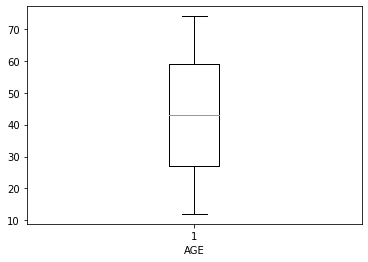

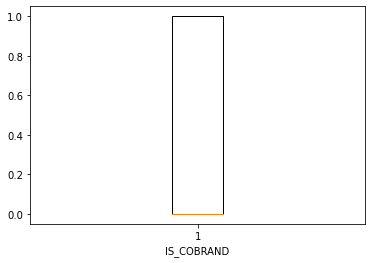

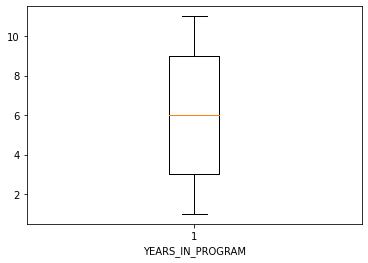

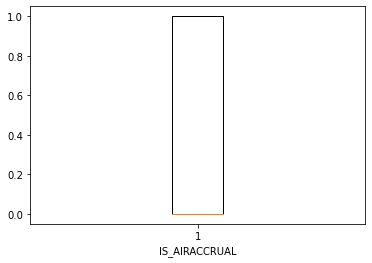

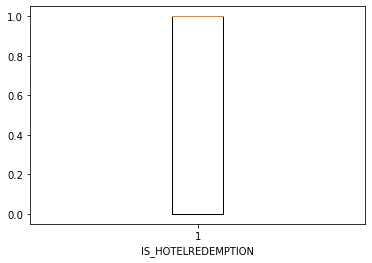

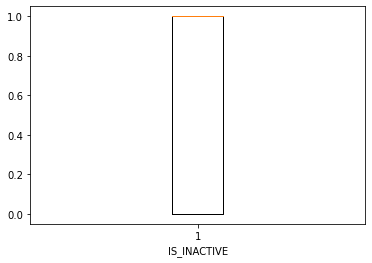

In [57]:
for c in air.columns:
    if c == "GENDER":
        continue
    elif c=="TIER":
        print("")
    else:
        plt.boxplot(air[c])
        plt.xlabel(c)
        plt.show()


# DUMMIES CREATION

In [58]:
dummy1 =pd.get_dummies(air['TIER'])
dummy1.head()
air = pd.concat([air,dummy1],axis=1)
air.head()

,AGE,GENDER,IS_COBRAND,TIER,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,IS_INACTIVE,base,gold,platinum,silver
0,60,male,0,gold,3,1,0,1,0,1,0,0
1,74,male,1,base,2,0,1,0,1,0,0,0
2,29,female,0,gold,11,0,1,0,0,1,0,0
3,25,male,0,gold,3,1,1,0,0,1,0,0
4,29,female,1,base,8,1,1,1,1,0,0,0


In [59]:
air=air.drop(columns=['GENDER','TIER'])

In [60]:
air.head()

,AGE,IS_COBRAND,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,IS_INACTIVE,base,gold,platinum,silver
0,60,0,3,1,0,1,0,1,0,0
1,74,1,2,0,1,0,1,0,0,0
2,29,0,11,0,1,0,0,1,0,0
3,25,0,3,1,1,0,0,1,0,0
4,29,1,8,1,1,1,1,0,0,0


In [61]:
Xs=air.drop(['IS_INACTIVE'],axis=1)
Y=air['IS_INACTIVE'].values.reshape(-1,1)

In [62]:
Xs.head()

,AGE,IS_COBRAND,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,base,gold,platinum,silver
0,60,0,3,1,0,0,1,0,0
1,74,1,2,0,1,1,0,0,0
2,29,0,11,0,1,0,1,0,0
3,25,0,3,1,1,0,1,0,0
4,29,1,8,1,1,1,0,0,0


## RANDOM FOREST CLASSIFIER

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [65]:
def random_forest_classifier(features, target):
    clf = RandomForestClassifier(random_state=84)
    clf.fit(features, target)
    return clf
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.33, random_state=66)
trained_model = random_forest_classifier(X_train,y_train)
predictions = trained_model.predict(X_test)
confusion_matrix1=confusion_matrix(y_test,predictions)
confusion_matrix1

/var/folders/bm/l2zpyjxn2gqg_1d20xgx5z0w0000gn/T/ipykernel_32255/2691818216.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(features, target)


array([[8159, 8278],
       [8392, 8171]])

In [66]:
accuracy=(sum(np.diagonal(confusion_matrix1))/np.sum(confusion_matrix1))*100
print(accuracy)

49.484848484848484


## DECISION TREE CLASSIFIER

In [67]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

In [68]:
accuracy1=metrics.accuracy_score(y_test, y_pred)

In [69]:
accuracy1*100

49.654545454545456


# INTERFACING

In [70]:
pip install flask flask-ngrok


Note: you may need to restart the kernel to use updated packages.


In [ ]:
trained_model

In [72]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pickle


In [95]:
from flask import Flask, request, render_template
import pickle
import os

# Create Flask app
app = Flask(__name__)

# Load the classifier
classifier_path = 'classifier.pkl'
if not os.path.isfile(classifier_path):
    raise FileNotFoundError(f"{classifier_path} not found in {os.getcwd()}")

with open(classifier_path, 'rb') as f:
    clf = pickle.load(f)

In [96]:
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.form
    age = int(data['age'])
    cobrand = int(data['cobrand'])
    years = int(data['years'])
    airaccural = int(data['airaccural'])
    hotel = int(data['hotel'])
    base = int(data['base'])
    gold = int(data['gold'])
    platinum = int(data['platinum'])
    silver = int(data['silver'])
    
    prediction = clf.predict([[age, cobrand, years, airaccural, hotel, base,gold,platinum,silver]])
    result = 'INACTIVE' if prediction[0] == 1 else 'ACTIVE'
    return render_template('result.html', result=result)

In [ ]:
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Jun/2024 17:38:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 17:38:33] "POST /predict HTTP/1.1" 200 -


In [81]:
X_test

,AGE,IS_COBRAND,YEARS_IN_PROGRAM,IS_AIRACCRUAL,IS_HOTELREDEMPTION,base,gold,platinum,silver
20818,72,0,4,0,1,1,0,0,0
51366,67,0,7,0,1,0,0,1,0
61821,25,0,11,1,0,0,1,0,0
38292,66,0,5,0,0,1,0,0,0
36183,64,1,11,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
55969,63,0,1,0,1,0,1,0,0
9200,57,1,2,0,0,1,0,0,0
28115,47,0,11,0,0,0,1,0,0
52351,19,0,1,0,0,0,0,1,0
